# Problem Statement No. 04

## Consider the Bangalore House Price Data. Perform following operations.
### a) Find and replace null values in the data using appropriate technique.
### b) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2
### c) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of the range to be taken.
### d) Calculate and add one more column as ‘Price_Per_Sqft’
### e) Remove the outliers from Price_Per_Sqft and BHK Size column if any.
### f) Apply the Linear Regression model to the data and display the training and testing performance measures as Mean  Squared Error and Accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('Banglore Housing Prices.csv')

In [3]:
df.head(10)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
5,Whitefield,2 BHK,1170,2.0,38.00
6,Old Airport Road,4 BHK,2732,4.0,204.00
7,Rajaji Nagar,4 BHK,3300,4.0,600.00
8,Marathahalli,3 BHK,1310,3.0,63.25
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [5]:
df.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df['size'] = [int(value.split(' ')[0]) for value in df['size']]

In [10]:
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,3453,4.0,231.00
13316,Richards Town,4,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2,1141,2.0,60.00
13318,Padmanabhanagar,4,4689,4.0,488.00


In [11]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [12]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [13]:
def convert_sqft(value):
    pattern = r'\d+\.*\d*'

    matches = re.findall(pattern, str(value))
    if len(matches) == 1:
        return matches[0]
    elif len(matches) == 2:
        start, end = float(matches[0]), float(matches[1])
        return (start + end) / 2



In [14]:
df['total_sqft'] = [float(convert_sqft(value)) for value in df['total_sqft']]

In [15]:
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [16]:
df['Price_per_sqft'] = [price/sqft for price,sqft in zip(df['price'],df['total_sqft'])]

In [17]:
df

,location,size,total_sqft,bath,price,Price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,0.036998
1,Chikka Tirupathi,4,2600.0,5.0,120.00,0.046154
2,Uttarahalli,3,1440.0,2.0,62.00,0.043056
3,Lingadheeranahalli,3,1521.0,3.0,95.00,0.062459
4,Kothanur,2,1200.0,2.0,51.00,0.042500
...,...,...,...,...,...,...
13315,Whitefield,5,3453.0,4.0,231.00,0.066898
13316,Richards Town,4,3600.0,5.0,400.00,0.111111
13317,Raja Rajeshwari Nagar,2,1141.0,2.0,60.00,0.052585
13318,Padmanabhanagar,4,4689.0,4.0,488.00,0.104073


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13246 non-null  object 
 1   size            13246 non-null  int64  
 2   total_sqft      13246 non-null  float64
 3   bath            13246 non-null  float64
 4   price           13246 non-null  float64
 5   Price_per_sqft  13246 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 724.4+ KB


In [19]:
outliers = ['Price_per_sqft','size']

In [20]:
outliers

['Price_per_sqft', 'size']

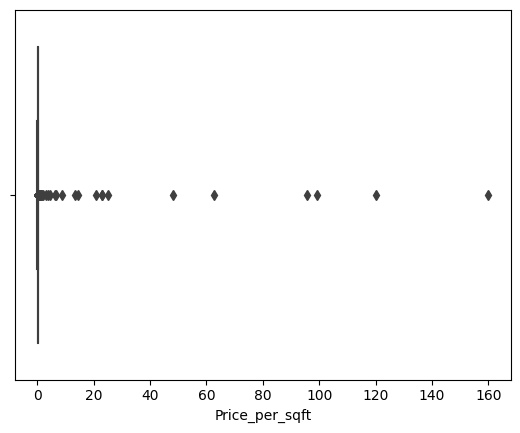

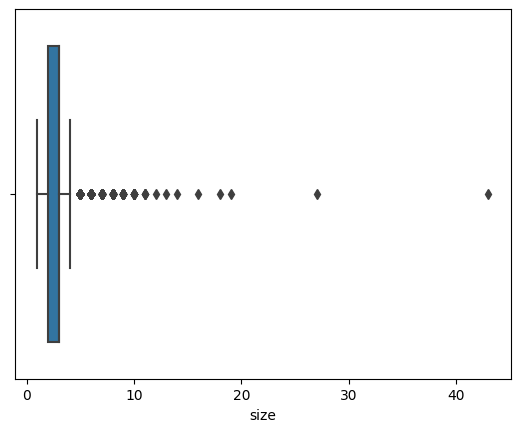

In [21]:
for i in outliers:
    sns.boxplot(x = df[i])
    plt.show()

In [22]:
for i in outliers:
    data = sorted(df[i])
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5*IQR)
    up_limit = Q3 + (1.5*IQR)

    df[i] = np.where((df[i]< low_limit),low_limit, np.where((df[i]>up_limit),up_limit,df[i]))
    

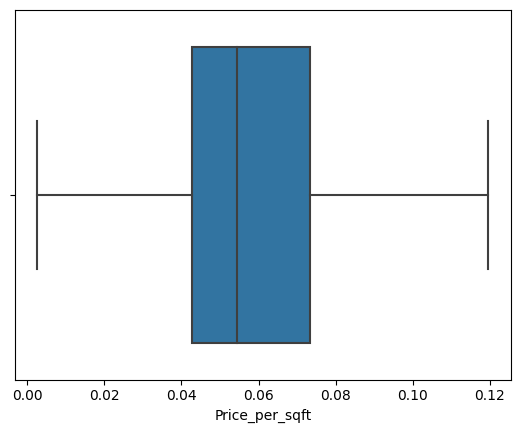

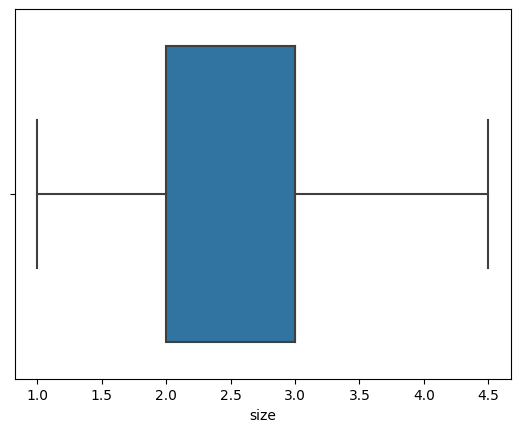

In [23]:
for i in outliers:
    sns.boxplot(x = df[i])
    plt.show()

In [24]:
X = df[['size','total_sqft','bath','Price_per_sqft']]
y = df['price']

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [27]:
X_train

,size,total_sqft,bath,Price_per_sqft
3601,2.0,1157.0,2.0,0.034572
4150,2.0,1157.0,2.0,0.034572
1515,2.0,1225.0,2.0,0.038253
8332,3.0,2400.0,3.0,0.119568
12095,2.0,1050.0,2.0,0.061905
...,...,...,...,...
12035,4.0,2360.0,3.0,0.078390
5224,3.0,2061.0,3.0,0.084910
5424,3.0,2400.0,3.0,0.036667
869,2.0,1342.0,2.0,0.054620


In [28]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [29]:
LR.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = LR.predict(X_test)

In [31]:
from sklearn.metrics import r2_score,mean_squared_error

In [32]:
accuracy = r2_score(y_test,y_pred)
mse = (mean_squared_error(y_test, y_pred))


In [33]:
accuracy,mse

(0.7310532966836263, 3394.894525171476)

In [40]:
cv = np.mean(cross_val_score(LR,X,y,cv = 5))

In [41]:
cv

0.5143594857348981